## Preprocessing Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

#from google.colab import files
#uploaded = files.upload()

In [ ]:
#dataset
weather = pd.read_csv('austin_weather.csv')
weather.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [ ]:
weather = weather.drop(['Date','Events'],axis=1)

In [ ]:
weather.columns

Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureHighInches',
       'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches'],
      dtype='object')

In [ ]:
weather.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T


"-"(missing data) value removal

In [ ]:
columns_to_check = ['DewPointHighF','DewPointAvgF','DewPointLowF','HumidityHighPercent','HumidityAvgPercent','HumidityLowPercent','SeaLevelPressureHighInches','SeaLevelPressureAvgInches','SeaLevelPressureLowInches','VisibilityHighMiles','VisibilityAvgMiles','VisibilityLowMiles','WindHighMPH','WindAvgMPH','WindGustMPH']

weather['num_dashes'] = weather[columns_to_check].apply(lambda row: (row == '-').sum(), axis=1)

filtered_row = weather[weather['num_dashes'] > 7]
filtered_row

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,num_dashes
176,91,83,74,-,-,-,-,-,-,29.98,29.9,29.87,-,-,-,14,9,23,0,9
596,103,89,74,-,-,-,100,65,29,-,-,-,-,-,-,-,-,-,0,12
597,105,90,74,-,-,-,100,62,24,-,-,-,-,-,-,14,6,20,0,9
598,105,90,75,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,15


In [ ]:
# drop rows more than 7 '-' value
filtered_indices = filtered_row.index
weather = weather.drop(filtered_indices)

In [ ]:
#drop the num_dashes column
weather.drop(weather.columns[-1], axis=1, inplace=True)

In [ ]:
#replace '-' value with 0
weather.replace("-",0, inplace=True)

T Value Conversion in Precipitation

In [ ]:
#create the precipitationtrace column
weather['PrecipitationTrace'] = weather['PrecipitationSumInches'].apply(lambda x: 1 if x=='T' else 0)

In [ ]:
#replace T with 0
weather['PrecipitationSumInches'].replace('T', 0, inplace=True)

Classifying rain based on precipitation range

In [ ]:
weather['DewPointHighF'] = weather['DewPointHighF'].astype(np.int)
weather['DewPointAvgF'] = weather['DewPointAvgF'].astype(np.int)
weather['DewPointLowF'] = weather['DewPointLowF'].astype(np.int)
weather['HumidityHighPercent'] = weather['HumidityHighPercent'].astype(np.int)
weather['HumidityAvgPercent'] = weather['HumidityAvgPercent'].astype(np.int)
weather['HumidityLowPercent'] = weather['HumidityLowPercent'].astype(np.int)
weather['SeaLevelPressureHighInches'] = weather['SeaLevelPressureHighInches'].astype(np.float)
weather['SeaLevelPressureAvgInches'] = weather['SeaLevelPressureAvgInches'].astype(np.float)
weather['SeaLevelPressureLowInches'] = weather['SeaLevelPressureLowInches'].astype(np.float)
weather['VisibilityHighMiles'] = weather['VisibilityHighMiles'].astype(np.int)
weather['VisibilityAvgMiles'] = weather['VisibilityAvgMiles'].astype(np.int)
weather['VisibilityLowMiles'] = weather['VisibilityLowMiles'].astype(np.int)
weather['WindHighMPH'] = weather['WindHighMPH'].astype(np.int)
weather['WindAvgMPH'] = weather['WindAvgMPH'].astype(np.int)
weather['WindGustMPH'] = weather['WindGustMPH'].astype(np.int)
weather['PrecipitationSumInches'] = weather['PrecipitationSumInches'].astype(np.float)
# weather['Rain'] = weather['Events'].astype(np.int)

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To

In [ ]:
# long period
weather['PrecipitateRange'] = pd.cut(weather['PrecipitationSumInches'], 
                                 bins=[-float('inf'),0.000,0.021, 0.157, float('inf')], 
                                 labels=['No Rain','Light', 'Moderate', 'Heavy'])

In [ ]:
# long period
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Define the encoding
encoding = {'No Rain' : 0, 'Light': 1, 'Moderate': 2, 'Heavy': 3}

# Fit the label encoder with the encoding
le.fit(list(encoding.keys()))

# Transform the actual column using the encoding
weather['PrecipitateRange'] = weather['PrecipitateRange'].apply(lambda x: encoding[x])

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset into a Pandas DataFrame


# Count the number of records for each label
label_counts = weather['PrecipitateRange'].value_counts()

# Create a bar chart to visualize the label distribution
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Data Splitting (features and labels)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
weather.columns

Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureHighInches',
       'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches',
       'PrecipitationTrace', 'PrecipitateRange'],
      dtype='object')

In [ ]:
# classification way
x = weather.drop(['PrecipitateRange','PrecipitationTrace','PrecipitationSumInches'], axis=1)
y = weather['PrecipitateRange']

with date & seasonal (monthly) runs the convert to year & month functions first

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = False)

In [ ]:
weather.dtypes

TempHighF                        int64
TempAvgF                         int64
TempLowF                         int64
DewPointHighF                    int32
DewPointAvgF                     int32
DewPointLowF                     int32
HumidityHighPercent              int32
HumidityAvgPercent               int32
HumidityLowPercent               int32
SeaLevelPressureHighInches     float64
SeaLevelPressureAvgInches      float64
SeaLevelPressureLowInches      float64
VisibilityHighMiles              int32
VisibilityAvgMiles               int32
VisibilityLowMiles               int32
WindHighMPH                      int32
WindAvgMPH                       int32
WindGustMPH                      int32
PrecipitationSumInches         float64
PrecipitationTrace               int64
PrecipitateRange              category
dtype: object

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

RF_model.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = RF_model.predict(X_test)



In [ ]:
print("accuracy_score is ",metrics.accuracy_score(y_test, y_pred_100))
print("precision is ",metrics.precision_score(y_test, y_pred_100, average='weighted'))
print("f1 score is ",metrics.f1_score(y_test, y_pred_100, average='weighted'))
print("recall is ",metrics.recall_score(y_test, y_pred_100, average='weighted'))

accuracy_score is  0.8403041825095057
precision is  0.7700627318054163
f1 score is  0.7995983081841684
recall is  0.8403041825095057


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
acc_RF = metrics.accuracy_score(y_test, y_pred_100)

In [ ]:
RF_feature = pd.Series(RF_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
RF_feature

VisibilityLowMiles            0.177858
VisibilityAvgMiles            0.112455
HumidityAvgPercent            0.093323
HumidityLowPercent            0.077927
WindGustMPH                   0.049690
DewPointHighF                 0.049518
HumidityHighPercent           0.048185
TempHighF                     0.046399
DewPointLowF                  0.045412
TempAvgF                      0.040401
SeaLevelPressureLowInches     0.038110
SeaLevelPressureAvgInches     0.037846
WindHighMPH                   0.037749
TempLowF                      0.037242
SeaLevelPressureHighInches    0.037177
DewPointAvgF                  0.036841
WindAvgMPH                    0.032173
VisibilityHighMiles           0.001696
dtype: float64

# XGBoost

In [ ]:
from sklearn import metrics

In [ ]:
from xgboost import XGBClassifier
# from sklearn.preprocessing import MinMaxScaler
# # from sklearn.preprocessing import LabelEncoder
# # le = LabelEncoder()
# # y_train = le.fit_transform(y_train)

XGB_model = XGBClassifier()
# fit model
XGB_model.fit(X_train, y_train)
# make predictions
preds_scale = XGB_model.predict(X_test)

In [ ]:
print("accuracy_score is ",metrics.accuracy_score(y_test, preds_scale))
print("precision is ",metrics.precision_score(y_test, preds_scale,average='weighted'))
print("f1 score is ",metrics.f1_score(y_test, preds_scale, average='weighted'))
print("recall is ",metrics.recall_score(y_test, preds_scale, average='weighted'))

accuracy_score is  0.8517110266159695
precision is  0.821398683959234
f1 score is  0.8318771949297102
recall is  0.8517110266159695


In [ ]:
acc_XGBoost = metrics.accuracy_score(y_test, preds_scale)

In [ ]:
XGB_feature = pd.Series(XGB_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
XGB_feature

VisibilityLowMiles            0.315460
TempAvgF                      0.059682
DewPointLowF                  0.056661
DewPointHighF                 0.052371
HumidityLowPercent            0.049692
HumidityAvgPercent            0.048378
HumidityHighPercent           0.045591
WindAvgMPH                    0.042296
TempHighF                     0.042144
WindHighMPH                   0.039937
WindGustMPH                   0.039415
VisibilityAvgMiles            0.037280
DewPointAvgF                  0.036506
SeaLevelPressureHighInches    0.036120
TempLowF                      0.035781
SeaLevelPressureAvgInches     0.031623
SeaLevelPressureLowInches     0.031063
VisibilityHighMiles           0.000000
dtype: float32

# SVM


In [ ]:
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
SVM_model = SVC(kernel='rbf', C=1).fit(X_train, y_train)

In [ ]:
y_pred = SVM_model.predict(X_test)

In [ ]:
print("accuracy_score is ",metrics.accuracy_score(y_test, y_pred))
print("precision is ",metrics.precision_score(y_test, y_pred, average='weighted'))
print("f1 score is ",metrics.f1_score(y_test, y_pred, average='weighted'))
print("recall is ",metrics.recall_score(y_test, y_pred, average='weighted'))

accuracy_score is  0.8136882129277566
precision is  0.7145879379759127
f1 score is  0.7590245064264508
recall is  0.8136882129277566


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
acc_SVM = metrics.accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
SVM_feature = permutation_importance(SVM_model, X_test, y_test)
feature_name = weather.columns

In [ ]:
features = np.array(feature_name)
sorted_idx = SVM_feature.importances_mean.argsort()

In [ ]:
SVM_feature = pd.Series(SVM_feature.importances_mean[sorted_idx], index=features[sorted_idx]).sort_values(ascending=False)
SVM_feature

HumidityLowPercent            0.023574
HumidityAvgPercent            0.013688
DewPointHighF                 0.009125
HumidityHighPercent           0.009125
WindGustMPH                   0.005323
VisibilityLowMiles            0.005323
TempHighF                     0.003802
DewPointAvgF                  0.003802
WindHighMPH                   0.003802
DewPointLowF                  0.003042
VisibilityHighMiles           0.000000
SeaLevelPressureLowInches     0.000000
SeaLevelPressureAvgInches     0.000000
SeaLevelPressureHighInches    0.000000
VisibilityAvgMiles            0.000000
TempLowF                     -0.000760
TempAvgF                     -0.002281
WindAvgMPH                   -0.003802
dtype: float64

# LSTM

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_onehot = to_categorical(y)

In [ ]:
y_train_lstm = to_categorical(y_train)

In [ ]:
y_test_lstm = to_categorical(y_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

In [ ]:
X_trainLSTM = scalerX.fit_transform(X_train)
X_testLSTM = scalerX.transform(X_test)

In [ ]:
import tensorflow as tf

In [ ]:
#reshape input data to a 3D tensor
X_train_reshaped = X_trainLSTM.reshape((X_trainLSTM.shape[0], 1, X_trainLSTM.shape[1]))
X_test_reshaped = X_testLSTM.reshape((X_testLSTM.shape[0], 1, X_testLSTM.shape[1]))

In [ ]:
X_train2 = tf.convert_to_tensor(X_train_reshaped, dtype=tf.float32)
X_test2 = tf.convert_to_tensor(X_test_reshaped, dtype=tf.float32)


In [ ]:
Y_train2 = tf.convert_to_tensor(y_train_lstm)

In [ ]:
Y_test2 = tf.convert_to_tensor(y_test_lstm)

In [ ]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(30, activation='relu', return_sequences=True, input_shape=(1, X_train2.shape[2])))
LSTM_model.add(LSTM(30, activation='relu', return_sequences=True))
LSTM_model.add(LSTM(30, activation='relu', return_sequences=True))
LSTM_model.add(LSTM(30, activation='relu'))
LSTM_model.add(Dense(4, activation='softmax'))

In [ ]:
#compile model
LSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
LSTM_model.fit(X_train2, Y_train2, epochs=100, batch_size=64, verbose=2)

Epoch 1/100
17/17 - 3s - loss: 0.6896 - accuracy: 0.6968 - 3s/epoch - 162ms/step
Epoch 2/100
17/17 - 0s - loss: 0.6810 - accuracy: 0.7452 - 25ms/epoch - 1ms/step
Epoch 3/100
17/17 - 0s - loss: 0.6694 - accuracy: 0.7452 - 25ms/epoch - 1ms/step
Epoch 4/100
17/17 - 0s - loss: 0.6427 - accuracy: 0.7452 - 25ms/epoch - 1ms/step
Epoch 5/100
17/17 - 0s - loss: 0.4918 - accuracy: 0.7452 - 25ms/epoch - 1ms/step
Epoch 6/100
17/17 - 0s - loss: 0.3684 - accuracy: 0.7452 - 25ms/epoch - 1ms/step
Epoch 7/100
17/17 - 0s - loss: 0.3511 - accuracy: 0.7452 - 25ms/epoch - 1ms/step
Epoch 8/100
17/17 - 0s - loss: 0.3367 - accuracy: 0.7452 - 25ms/epoch - 1ms/step
Epoch 9/100
17/17 - 0s - loss: 0.3249 - accuracy: 0.7452 - 24ms/epoch - 1ms/step
Epoch 10/100
17/17 - 0s - loss: 0.3152 - accuracy: 0.7452 - 24ms/epoch - 1ms/step
Epoch 11/100
17/17 - 0s - loss: 0.3068 - accuracy: 0.7452 - 24ms/epoch - 1ms/step
Epoch 12/100
17/17 - 0s - loss: 0.2990 - accuracy: 0.7452 - 24ms/epoch - 1ms/step
Epoch 13/100
17/17 - 0s -

In [ ]:
loss, accuracy = LSTM_model.evaluate(X_train2, Y_train2, verbose=0)
print(f'Test accuracy: {accuracy:.3f}')

Test accuracy: 0.816


In [ ]:
y_pred = LSTM_model.predict(X_test2)

9/9 [==============================] - 0s 695us/step


In [ ]:
y_pred1 = np.around(y_pred)

In [ ]:
y_test = np.argmax(y_test_lstm, axis=1)

In [ ]:
y_pred_ori = np.argmax(y_pred1, axis=1)

In [ ]:
from sklearn import metrics


print("accuracy_score is ",metrics.accuracy_score(y_test, y_pred_ori))
print("precision is ",metrics.precision_score(y_test, y_pred_ori, average='weighted'))
print("f1 score is ",metrics.f1_score(y_test, y_pred_ori, average='weighted'))
print("recall is ",metrics.recall_score(y_test, y_pred_ori, average='weighted'))

accuracy_score is  0.8403041825095057
precision is  0.778771820146408
f1 score is  0.8028512551175789
recall is  0.8403041825095057


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
acc_LSTM = metrics.accuracy_score(y_test, y_pred_ori)

In [ ]:
lstm_feature = pd.Series(LSTM_model.layers[0].get_weights()[0].sum(axis=1), index=X_train.columns).sort_values(ascending=False)
lstm_feature

VisibilityLowMiles            19.852123
TempHighF                     10.281764
VisibilityHighMiles            9.129763
VisibilityAvgMiles             8.716173
WindAvgMPH                     5.289891
TempAvgF                       5.222138
HumidityHighPercent            3.097316
SeaLevelPressureAvgInches      2.763585
DewPointHighF                  2.689392
SeaLevelPressureLowInches      1.489693
DewPointAvgF                   1.479079
HumidityAvgPercent             0.927934
DewPointLowF                   0.120391
SeaLevelPressureHighInches    -0.409543
TempLowF                      -1.328266
WindGustMPH                   -3.113784
HumidityLowPercent            -6.541980
WindHighMPH                   -8.963536
dtype: float32

#Highest Accuracy

In [ ]:
models = {
    'SVM': SVM_model,
    'RF': RF_model,
    'XGBoost': XGB_model,
    'LSTM': LSTM_model
}

In [ ]:
highest_acc_var = max([(acc_SVM, 'SVM'), (acc_RF, 'RF'), (acc_XGBoost, 'XGBoost'), (acc_LSTM, 'LSTM')])
highest_acc_var

(0.8517110266159695, 'XGBoost')

# Feature selection

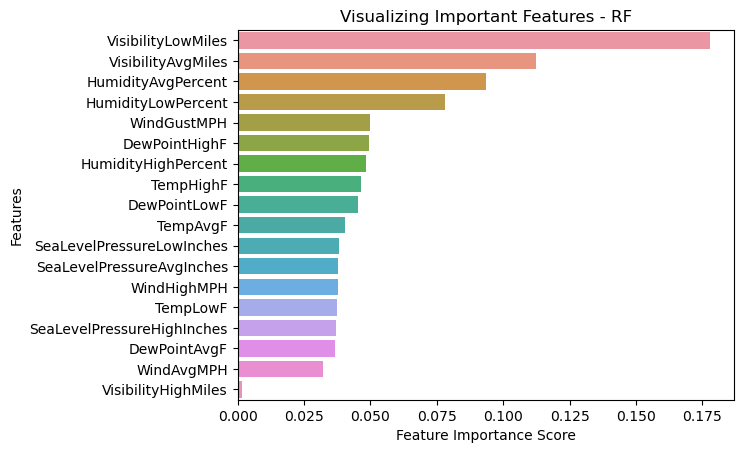

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=RF_feature, y=RF_feature.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features - RF")



# Visualize the graph

plt.show()

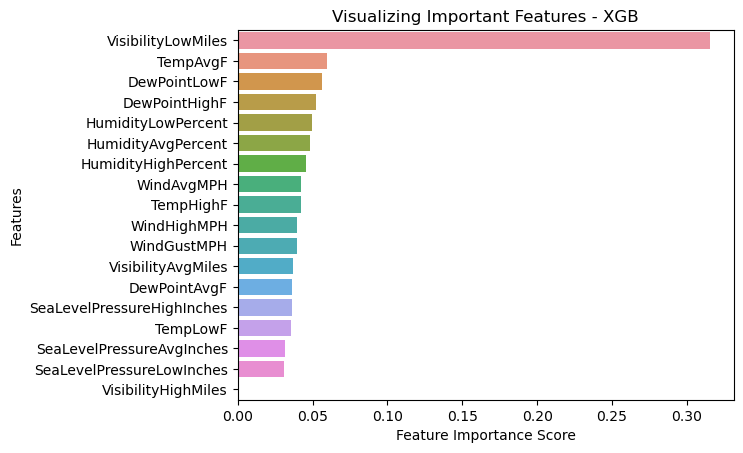

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=XGB_feature, y=XGB_feature.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features - XGB")



# Visualize the graph

plt.show()

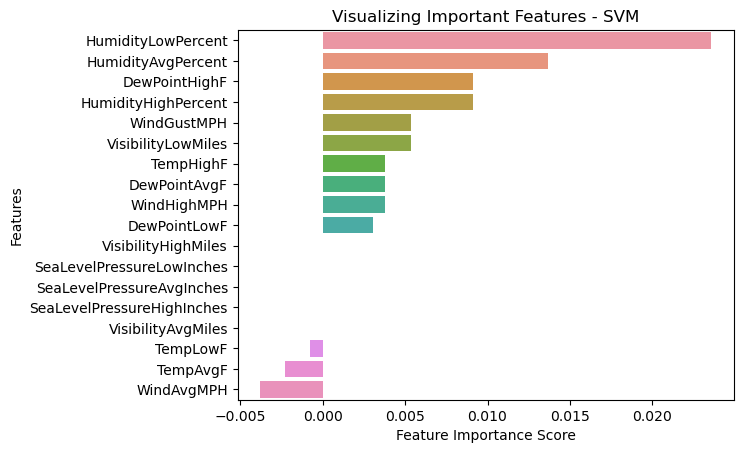

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=SVM_feature, y=SVM_feature.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features - SVM")



# Visualize the graph

plt.show()

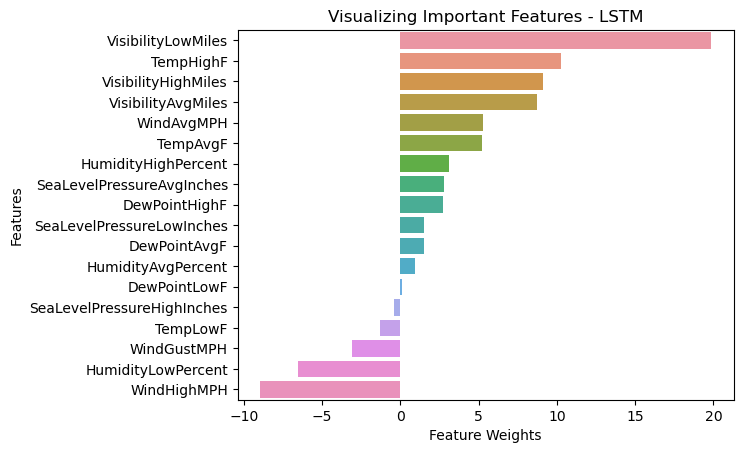

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=lstm_feature, y=lstm_feature.index)



# Add labels to the graph

plt.xlabel('Feature Weights')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features - LSTM")



# Visualize the graph

plt.show()

In [ ]:
features_df = pd.concat([lstm_feature, SVM_feature, XGB_feature, RF_feature], axis=1)

# Rename the columns to match the model names
features_df.columns = ['lstm', 'svm', 'xgb', 'rf']

top_features_dict = {}

for model_name in features_df.columns:
    model_features = features_df[model_name].sort_values(ascending=False)
    top_features = model_features
    top_features_dict[model_name] = top_features

top_features_df = pd.concat(top_features_dict.values(), axis=1, keys=top_features_dict.keys())


print("Features and weight for each model:")
print(top_features_df)
print()

Features and weight for each model:
                                 lstm       svm       xgb        rf
VisibilityLowMiles          19.852123  0.005323  0.315460  0.177858
TempHighF                   10.281764  0.003802  0.042144  0.046399
VisibilityHighMiles          9.129763  0.000000  0.000000  0.001696
VisibilityAvgMiles           8.716173  0.000000  0.037280  0.112455
WindAvgMPH                   5.289891 -0.003802  0.042296  0.032173
TempAvgF                     5.222138 -0.002281  0.059682  0.040401
HumidityHighPercent          3.097316  0.009125  0.045591  0.048185
SeaLevelPressureAvgInches    2.763585  0.000000  0.031623  0.037846
DewPointHighF                2.689392  0.009125  0.052371  0.049518
SeaLevelPressureLowInches    1.489693  0.000000  0.031063  0.038110
DewPointAvgF                 1.479079  0.003802  0.036506  0.036841
HumidityAvgPercent           0.927934  0.013688  0.048378  0.093323
DewPointLowF                 0.120391  0.003042  0.056661  0.045412
SeaLevelPres

In [ ]:
features_df = pd.concat([lstm_feature, SVM_feature, XGB_feature, RF_feature], axis=1)

# Rename the columns to match the model names
features_df.columns = ['lstm', 'svm', 'xgb', 'rf']

# Create a dictionary to store the top 10 features for each model
top_features_dict = {}

for model_name in features_df.columns:
    # Sort the important features for the current model by their value in descending order
    model_features = features_df[model_name].sort_values(ascending=False)
    # Take the top 10 features
    top_features = model_features.head(10)
    # Add the top 10 features to the dictionary
    top_features_dict[model_name] = top_features

# Concatenate the top 10 features into a single DataFrame
top_features_df = pd.concat(top_features_dict.values(), axis=1, keys=top_features_dict.keys())


# Print the top 10 features for each model
print("Top 10 features for each model:")
print(top_features_df)
print()


Top 10 features for each model:
                                lstm       svm       xgb        rf
VisibilityLowMiles         19.852123  0.005323  0.315460  0.177858
TempHighF                  10.281764  0.003802  0.042144  0.046399
VisibilityHighMiles         9.129763       NaN       NaN       NaN
VisibilityAvgMiles          8.716173       NaN       NaN  0.112455
WindAvgMPH                  5.289891       NaN  0.042296       NaN
TempAvgF                    5.222138       NaN  0.059682  0.040401
HumidityHighPercent         3.097316  0.009125  0.045591  0.048185
SeaLevelPressureAvgInches   2.763585       NaN       NaN       NaN
DewPointHighF               2.689392  0.009125  0.052371  0.049518
SeaLevelPressureLowInches   1.489693       NaN       NaN       NaN
HumidityLowPercent               NaN  0.023574  0.049692  0.077927
HumidityAvgPercent               NaN  0.013688  0.048378  0.093323
WindGustMPH                      NaN  0.005323       NaN  0.049690
DewPointAvgF                  

In [ ]:
for model_name in features_df.columns:
    # Sort the important features for the current model by their value in descending order
    model_features = features_df[model_name].sort_values(ascending=False)
    # Take the top 10 features
    top_features = model_features.head(10)
    # Print the top 10 feature names for the current model
    print(f"Top 10 features for {model_name}:")
    print(top_features.index.tolist())
    print()


Top 10 features for lstm:
['VisibilityLowMiles', 'TempHighF', 'VisibilityHighMiles', 'VisibilityAvgMiles', 'WindAvgMPH', 'TempAvgF', 'HumidityHighPercent', 'SeaLevelPressureAvgInches', 'DewPointHighF', 'SeaLevelPressureLowInches']

Top 10 features for svm:
['HumidityLowPercent', 'HumidityAvgPercent', 'DewPointHighF', 'HumidityHighPercent', 'VisibilityLowMiles', 'WindGustMPH', 'TempHighF', 'DewPointAvgF', 'WindHighMPH', 'DewPointLowF']

Top 10 features for xgb:
['VisibilityLowMiles', 'TempAvgF', 'DewPointLowF', 'DewPointHighF', 'HumidityLowPercent', 'HumidityAvgPercent', 'HumidityHighPercent', 'WindAvgMPH', 'TempHighF', 'WindHighMPH']

Top 10 features for rf:
['VisibilityLowMiles', 'VisibilityAvgMiles', 'HumidityAvgPercent', 'HumidityLowPercent', 'WindGustMPH', 'DewPointHighF', 'HumidityHighPercent', 'TempHighF', 'DewPointLowF', 'TempAvgF']



In [ ]:
features_df = pd.concat([lstm_feature, SVM_feature, XGB_feature, RF_feature], axis=1)

# Rename the columns to match the model names
features_df.columns = ['lstm', 'svm', 'xgb', 'rf']

# Create a dictionary to store the top 10 features for each model
top_features_dict = {}

# Create a list to hold the top 10 features for each model
top_features_list = []

for model_name in features_df.columns:
    # Sort the important features for the current model by their value in descending order
    model_features = features_df[model_name].sort_values(ascending=False)
    # Take the top 10 features
    top_features = model_features.head(10)
    # Append the top 10 feature names to the list
    top_features_list.append(set(top_features.index.tolist()))

# Find the intersection of all the sets in top_features_list
repeated_features = set.intersection(*top_features_list)

# Print the repeated features
print("Repeated features:")
print(list(repeated_features))



Repeated features:
['VisibilityLowMiles', 'DewPointHighF', 'HumidityHighPercent', 'TempHighF']


# Using feature selected create a new dataset for training of model

In [ ]:
weather.columns

Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureHighInches',
       'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches',
       'PrecipitationTrace', 'PrecipitateRange'],
      dtype='object')

In [ ]:
imprt_feature = list(repeated_features)
imprt_feature.append('PrecipitateRange')
imprt_feature

['VisibilityLowMiles',
 'DewPointHighF',
 'HumidityHighPercent',
 'TempHighF',
 'PrecipitateRange']

In [ ]:
weather2 = weather[imprt_feature]
weather2

,VisibilityLowMiles,DewPointHighF,HumidityHighPercent,TempHighF,PrecipitateRange
0,2,67,93,74,3
1,5,43,93,56,0
2,10,31,76,58,0
3,7,36,89,61,0
4,7,44,86,58,0
...,...,...,...,...,...
1314,10,71,82,103,0
1315,10,71,87,105,0
1316,10,72,82,107,0
1317,10,70,69,106,0


In [ ]:
weather2.to_csv('preprocessed_data.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
x = weather2.drop(['PrecipitateRange'],axis=1)
y = weather2['PrecipitateRange']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = False)

##RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

RF_model.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = RF_model.predict(X_test)



In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_100)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[195   2   4   5]
 [ 11   0   2   4]
 [  4   0   2   6]
 [  5   1   6  16]]


In [ ]:
print("accuracy_score is ",metrics.accuracy_score(y_test, y_pred_100))
print("precision is ",metrics.precision_score(y_test, y_pred_100, average='weighted'))
print("f1 score is ",metrics.f1_score(y_test, y_pred_100, average='weighted'))
print("recall is ",metrics.recall_score(y_test, y_pred_100, average='weighted'))

accuracy_score is  0.8098859315589354
precision is  0.7718749350564147
f1 score is  0.7903572184158167
recall is  0.8098859315589354


In [ ]:
acc_RF = metrics.accuracy_score(y_test, y_pred_100)

In [ ]:
RF_class = 0

All classes have been predicted
               precision    recall  f1-score   support

      no rain       0.91      0.95      0.93       206
   small rain       0.00      0.00      0.00        17
moderate rain       0.14      0.17      0.15        12
   heavy rain       0.52      0.57      0.54        28

     accuracy                           0.81       263
    macro avg       0.39      0.42      0.41       263
 weighted avg       0.77      0.81      0.79       263



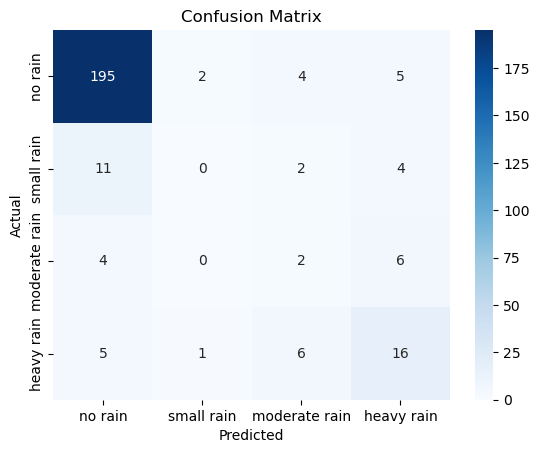

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# y_test and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred_100)

# Define class labels
class_labels = ['no rain', 'small rain', 'moderate rain', 'heavy rain']

# Check if all classes are predicted
if set(y_test) == set(y_pred_100):
    RF_class = 1
    print("All classes have been predicted")
else:
    print("Some classes have not been predicted")

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Print classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred_100, target_names=class_labels))


##XGBoost

In [ ]:
from sklearn import metrics

In [ ]:
from xgboost import XGBClassifier
# from sklearn.preprocessing import MinMaxScaler
# # from sklearn.preprocessing import LabelEncoder
# # le = LabelEncoder()
# # y_train = le.fit_transform(y_train)

XGB_model = XGBClassifier()
# fit model
XGB_model.fit(X_train, y_train)
# make predictions
y_pred_xgb = XGB_model.predict(X_test)

In [ ]:
print("accuracy_score is ",metrics.accuracy_score(y_test, y_pred_xgb))
print("precision is ",metrics.precision_score(y_test, y_pred_xgb,average='weighted'))
print("f1 score is ",metrics.f1_score(y_test, y_pred_xgb, average='weighted'))
print("recall is ",metrics.recall_score(y_test, y_pred_xgb, average='weighted'))

accuracy_score is  0.7984790874524715
precision is  0.7725591968937977
f1 score is  0.7826006908954308
recall is  0.7984790874524715


In [ ]:
acc_XGBoost = metrics.accuracy_score(y_test, y_pred_xgb)

In [ ]:
XGB_class = 0

All classes have been predicted
               precision    recall  f1-score   support

      no rain       0.91      0.95      0.93       206
   small rain       0.20      0.06      0.09        17
moderate rain       0.07      0.08      0.08        12
   heavy rain       0.43      0.43      0.43        28

     accuracy                           0.80       263
    macro avg       0.40      0.38      0.38       263
 weighted avg       0.77      0.80      0.78       263



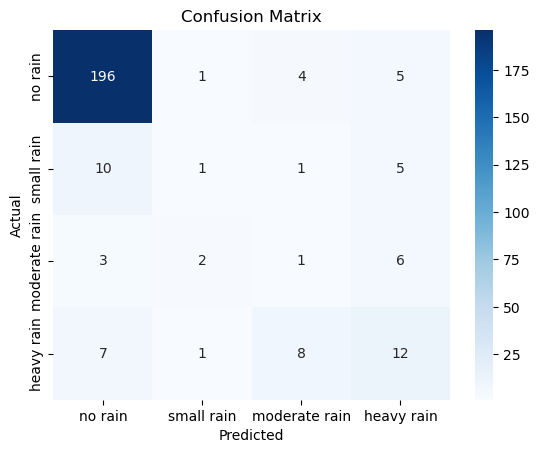

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# y_test and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred_xgb)

# Define class labels
class_labels = ['no rain', 'small rain', 'moderate rain', 'heavy rain']

# Check if all classes are predicted
if set(y_test) == set(y_pred_xgb):
    XGB_class = 1
    print("All classes have been predicted")
else:
    print("Some classes have not been predicted")

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Print classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred_xgb, target_names=class_labels))


##SVM

In [ ]:
from sklearn.svm import SVC, SVR
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
from sklearn.svm import SVC, SVR
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
SVM_model = SVC(kernel='rbf', C=1).fit(X_train, y_train)

In [ ]:
y_pred = SVM_model.predict(X_test)

In [ ]:
print("accuracy_score is ",metrics.accuracy_score(y_test, y_pred))
print("precision is ",metrics.precision_score(y_test, y_pred, average='weighted'))
print("f1 score is ",metrics.f1_score(y_test, y_pred, average='weighted'))
print("recall is ",metrics.recall_score(y_test, y_pred, average='weighted'))

accuracy_score is  0.8288973384030418
precision is  0.7404417991149171
f1 score is  0.782065976701334
recall is  0.8288973384030418


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
acc_SVM = metrics.accuracy_score(y_test, y_pred)

In [ ]:
SVM_class = 0

Some classes have not been predicted
               precision    recall  f1-score   support

      no rain       0.87      0.97      0.92       206
   small rain       0.00      0.00      0.00        17
moderate rain       0.00      0.00      0.00        12
   heavy rain       0.53      0.64      0.58        28

     accuracy                           0.83       263
    macro avg       0.35      0.40      0.38       263
 weighted avg       0.74      0.83      0.78       263



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


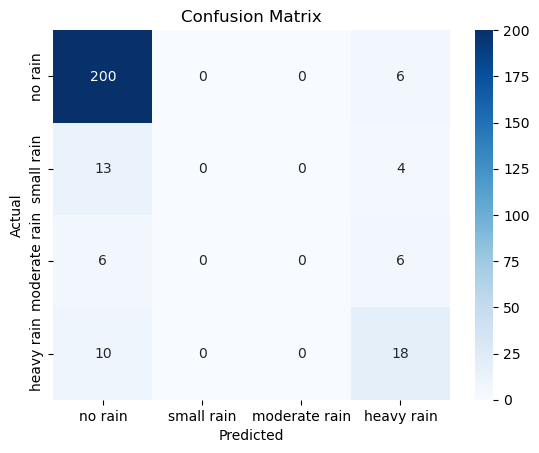

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# y_test and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['no rain', 'small rain', 'moderate rain', 'heavy rain']

# Check if all classes are predicted
if set(y_test) == set(y_pred):
    SVM_class = 1
    print("All classes have been predicted")
else:
    print("Some classes have not been predicted")

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Print classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred, target_names=class_labels))


##LSTM

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_onehot = to_categorical(y)

In [ ]:
y_train_lstm = to_categorical(y_train)

In [ ]:
y_test_lstm = to_categorical(y_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

In [ ]:
X_trainLSTM = scalerX.fit_transform(X_train)
X_testLSTM = scalerX.transform(X_test)

In [ ]:
import tensorflow as tf

In [ ]:
#reshape input data to a 3D tensor
X_train_reshaped = X_trainLSTM.reshape((X_trainLSTM.shape[0], 1, X_trainLSTM.shape[1]))
X_test_reshaped = X_testLSTM.reshape((X_testLSTM.shape[0], 1, X_testLSTM.shape[1]))

In [ ]:
X_train2 = tf.convert_to_tensor(X_train_reshaped, dtype=tf.float32)
X_test2 = tf.convert_to_tensor(X_test_reshaped, dtype=tf.float32)


In [ ]:
Y_train2 = tf.convert_to_tensor(y_train_lstm)

In [ ]:
Y_test2 = tf.convert_to_tensor(y_test_lstm)

In [ ]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(30, activation='relu', return_sequences=True, input_shape=(1, X_train2.shape[2])))
LSTM_model.add(LSTM(30, activation='relu', return_sequences=True))
LSTM_model.add(LSTM(30, activation='relu', return_sequences=True))
LSTM_model.add(LSTM(30, activation='relu'))
LSTM_model.add(Dense(4, activation='softmax'))

In [ ]:
#compile model
LSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
LSTM_model.fit(X_train2, Y_train2, epochs=100, batch_size=64, verbose=2)

Epoch 1/100
17/17 - 3s - loss: 0.6892 - accuracy: 0.7006 - 3s/epoch - 156ms/step
Epoch 2/100
17/17 - 0s - loss: 0.6796 - accuracy: 0.7452 - 25ms/epoch - 1ms/step
Epoch 3/100
17/17 - 0s - loss: 0.6677 - accuracy: 0.7452 - 25ms/epoch - 1ms/step
Epoch 4/100
17/17 - 0s - loss: 0.6492 - accuracy: 0.7452 - 26ms/epoch - 2ms/step
Epoch 5/100
17/17 - 0s - loss: 0.6068 - accuracy: 0.7452 - 26ms/epoch - 2ms/step
Epoch 6/100
17/17 - 0s - loss: 0.4538 - accuracy: 0.7452 - 25ms/epoch - 1ms/step
Epoch 7/100
17/17 - 0s - loss: 0.3344 - accuracy: 0.7452 - 27ms/epoch - 2ms/step
Epoch 8/100
17/17 - 0s - loss: 0.3168 - accuracy: 0.7452 - 26ms/epoch - 2ms/step
Epoch 9/100
17/17 - 0s - loss: 0.3091 - accuracy: 0.7452 - 25ms/epoch - 1ms/step
Epoch 10/100
17/17 - 0s - loss: 0.3012 - accuracy: 0.7452 - 26ms/epoch - 2ms/step
Epoch 11/100
17/17 - 0s - loss: 0.2958 - accuracy: 0.7452 - 25ms/epoch - 1ms/step
Epoch 12/100
17/17 - 0s - loss: 0.2914 - accuracy: 0.7452 - 25ms/epoch - 1ms/step
Epoch 13/100
17/17 - 0s -

In [ ]:
loss, accuracy = LSTM_model.evaluate(X_train2, Y_train2, verbose=0)
print(f'Test accuracy: {accuracy:.3f}')

Test accuracy: 0.820


In [ ]:
y_pred = LSTM_model.predict(X_test2)

9/9 [==============================] - 0s 761us/step


In [ ]:
y_pred1 = np.around(y_pred)

In [ ]:
y_test = np.argmax(y_test_lstm, axis=1)

In [ ]:
y_pred_ori = np.argmax(y_pred1, axis=1)

In [ ]:
from sklearn import metrics


print("accuracy_score is ",metrics.accuracy_score(y_test, y_pred_ori))
print("precision is ",metrics.precision_score(y_test, y_pred_ori, average='weighted'))
print("f1 score is ",metrics.f1_score(y_test, y_pred_ori, average='weighted'))
print("recall is ",metrics.recall_score(y_test, y_pred_ori, average='weighted'))

accuracy_score is  0.8174904942965779
precision is  0.7301806205737313
f1 score is  0.7712622530878558
recall is  0.8174904942965779


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
acc_LSTM = metrics.accuracy_score(y_test, y_pred_ori)

In [ ]:
LSTM_class = 0

Some classes have not been predicted
               precision    recall  f1-score   support

      no rain       0.86      0.96      0.91       206
   small rain       0.00      0.00      0.00        17
moderate rain       0.00      0.00      0.00        12
   heavy rain       0.53      0.64      0.58        28

     accuracy                           0.82       263
    macro avg       0.35      0.40      0.37       263
 weighted avg       0.73      0.82      0.77       263



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


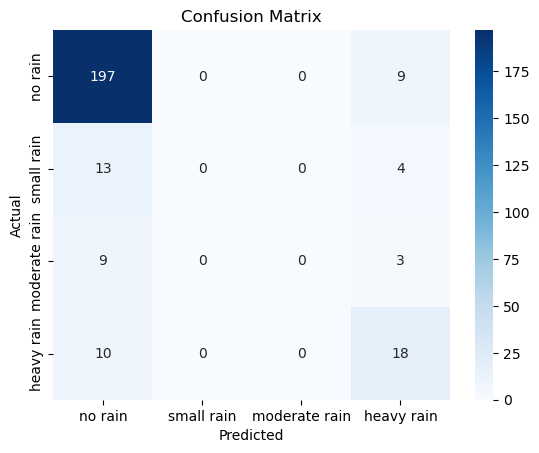

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# y_test and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred_ori)

# Define class labels
class_labels = ['no rain', 'small rain', 'moderate rain', 'heavy rain']

# Check if all classes are predicted
if set(y_test) == set(y_pred_ori):
    LSTM_class = 1
    print("All classes have been predicted")
else:
    print("Some classes have not been predicted")

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Print classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred_ori, target_names=class_labels))


#Selecting the best model and saving it

In [ ]:
import joblib

In [ ]:
models = {
    'SVM': SVM_model,
    'RF': RF_model,
    'XGBoost': XGB_model,
    'LSTM': LSTM_model
}

In [ ]:
model_class = {
    'SVM_class': SVM_class,
    'RF_class': RF_class,
    'XGB_class': XGB_class,
    'LSTM_class': LSTM_class}

In [ ]:
# Define the class predictions
class_predictions = [SVM_class, RF_class, XGB_class, LSTM_class]

# Initialize an empty list to store models with a class prediction of 1
class_one_models = []

# Loop through the models and their class predictions
for i, class_pred in enumerate(class_predictions):
    # Check if the current model has a class prediction of 1
    if class_pred == 1:
        # If so, append the model name to the list of class one models
        class_one_models.append(list(models.keys())[i])

# Find the model with the highest accuracy among the class one models
best_class_one_model = None
best_class_one_acc = 0.0
for model_name in class_one_models:
    # Get the accuracy of the current model
    model_acc = locals()[f'acc_{model_name}']
    # Update the best class one model if the current model has a higher accuracy
    if model_acc > best_class_one_acc:
        best_class_one_model = model_name
        best_class_one_acc = model_acc

# Print the best class one model and its accuracy
print(f"Model {best_class_one_model} was able to predict all classes with an accuracy of {best_class_one_acc}")


Model RF was able to predict all classes with an accuracy of 0.8098859315589354


In [ ]:
joblib.dump(models[best_class_one_model], 'rainpred_model.joblib')

['rainpred_model.joblib']

In [ ]:
model = joblib.load('rainpred_model.joblib')

# END